<a href="https://colab.research.google.com/github/RyanSchw/hackohio/blob/master/VineSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This document analyzes the sentiment of vine quotes in general and builds a distribution based on those quotes.

In [86]:
! pip install azure-cognitiveservices-language-textanalytics

In [0]:
from azure.cognitiveservices.language.textanalytics import TextAnalyticsClient
from msrest.authentication import CognitiveServicesCredentials

import os
import numpy as np 
import pandas as pd 
from pathlib import Path

In [0]:
subscription_key = ''
endpoint = ''

In [0]:
credentials = CognitiveServicesCredentials(subscription_key)
text_analytics = TextAnalyticsClient(endpoint=endpoint, credentials=credentials)

Cognitive services is ready to go! Now load everything from google drive.

In [90]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
path=Path('/content/gdrive/My Drive/hackohio')

In [0]:
df = pd.read_csv(path/'vines.csv')
df.columns = ['Vine_Energy', 'Quote']

In [0]:
doc = []
for i, row in df.iterrows():
  quote = row['Quote']
  doc.append({
      "id": i,
      "language": "en",
      "text": quote
  })

In [94]:
response = text_analytics.sentiment(documents=doc)
sentiments = []
for document in response.documents:
  sentiments.append(document.score)
df['Sentiment'] = sentiments

HttpOperationError: ignored

Adjust data to be a little bit more generalized

In [83]:
df['Vine_Energy'] = df['Vine_Energy'].div(4).apply(np.floor).add(1).astype('int')
df['Sentiment'] = df['Sentiment'].mul(5).apply(np.floor)

KeyError: ignored

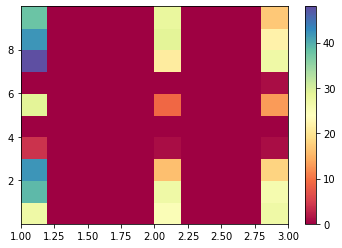

In [79]:
import matplotlib.pyplot as plt
h = plt.hist2d(df['Vine_Energy'], df['Sentiment'], cmap='Spectral')
plt.colorbar(h[3])
plt.show()

Based on the plot, we can conclude that the general sentiment of the lower quality quotes is positive rather than negative